# Сборный проект

## Постановка задачи

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Изучаем данные

Импортируем библиотеку pandas и прочитаем файл с данными в датафрейм df. Используем обобщенное название для удобства переиспользования своего кода.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/games.csv')

Просмотрим первые строки датафрейма и общую информацию о нем.

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Названия столбцов следует привести к нижнему регистру для удобства работы.

Имеются пропуски - необходимо будет их обработать. Интересно, что в 2 записях пропущено название игры - их скорее всего придется отбросить из выборки.

Имеются проблемы с форматом - пользовательскую оценку следует привести к числовому формату, а год релиза - к целочисленному.

Также стоит проверить категориальные переменные на наличие дубликатов в связи с разным регистром либо другими подобными проблемами: название, платформа, жанр и рейтинг.

### Вывод

Был открыт и изучен файл с данными по продажам видеоигр до 2016 года.

В данных есть проблемы: регистр в названиях столбцов, формат, пропуски возможность дубликатов. Потребуется предобработка.

## Шаг 2. Готовим данные

Для подготовки данных к анализу нам потребуется:
* заменить названия столбцов;
* преобразовать данные в нужные типы;
* обработать пропуски при необходимости;
* посчитать суммарные продажи во всех регионах.

### Названия столбцов

Приведем названия столбцов к нижнему регистру.

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Теперь работать будет удобнее.

### Типы данных

Для года выпуска игры и пользовательской оценки скорректируем тип данных.

#### Столбец year_of_release

Год - это целое число. Приведем содержимое столбца year_of_release к целочисленному формату.

In [7]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [8]:
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E


#### Столбец user_score

Оценка - это число, но в данные она внесена как строка. Попробуем перевести в числовой формат, но прежде посмотрим, из-за каких значений pandas не смог прочитать этот столбец как число изначально.

In [9]:
#Этот кусочек закомментирован, чтобы было возможно запустить выполение всех ячеек
#df['user_score'] = pd.to_numeric(df['user_score'], errors='raise')

Ошибка вызвана значением "tbd" - To Be Determined. Посмотрим, что за записи имеют такое обозначение.

In [10]:
df[df['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


По 5 строкам мы видим, что платформы, жанры и года релиза самые разные. Продаж в Японии нет - возможно, в этом дело? Посмотрим.

In [11]:
df[df['user_score'] == 'tbd']['jp_sales'].unique()

array([0.  , 0.04, 0.03, 0.01, 0.02, 0.86, 0.09, 0.17, 0.12, 0.18, 0.47,
       0.26, 0.31, 0.2 , 0.16, 0.25, 0.14, 0.1 , 0.13, 0.06, 0.11, 0.15,
       0.08, 0.05])

Продажи все-таки есть. Видимо, этот такой способ обозначить, что рейтинг неизвестен у одного из источников данных. Можем заменить эти значения на NaN при переводе столбца в числовой формат.

In [12]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [13]:
df['user_score'].dtype

dtype('float64')

### Пропущенные значения

Оценим количество явных пропусков. Составим датафрейм с количеством и долей пропущенных значений.

In [14]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [15]:
count_missing = df.isnull().sum()

In [16]:
missing_values_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing, 'count_missing': count_missing})
missing_values_df

,column_name,percent_missing,count_missing
name,name,0.011965,2
platform,platform,0.000000,0
year_of_release,year_of_release,1.609333,269
genre,genre,0.011965,2
na_sales,na_sales,0.000000,0
eu_sales,eu_sales,0.000000,0
jp_sales,jp_sales,0.000000,0
other_sales,other_sales,0.000000,0
critic_score,critic_score,51.319174,8578
user_score,user_score,54.591684,9125


Год релиза, оценка пользователей и критиков, а также рейтинг ESRB вполне могли отсутствовать в открытых источниках, из которых брались данные для нашей выгрузки. 

Название игры игры и жанр имеют по 2 пропущенных значения - они могли потеряться при ручном заполнении данных, если такое было.

Также ранее мы видели нулевые продажи для отдельных регионов. Это скорее всего означает, что в данном регионе игра не выпускалась.

Заполнить пропуски, используя данные только в пределах имеющейся выгрузки, невозможно. 

Рассмотрим отдельно записи, где пропущен жанр. Убедимся, что это не полностью нулевые строки, которые следует отфильтровать из выборки.

In [17]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих записях пропущено почти все, а возможно, это записи об одной и той же игре. Тем не менее, они несут информацию о том, что в 1993 году игры на GEN выходили. Оставим их.

### Суммарные продажи

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

Были приведены к нижнему регистру названия столбцов.

Были преобразованы к нужным типам данные: год выпуска игры к целочисленному типу, пользовательская оценка - к числовому с плавающей запятой. В столбце с пользовательской оценкой содержались значения "tbd" - вероятно, так обозначили отсутствие информации в одном из источников данных. Мы заменили эти значения на подходящие для расчетов NaN.

Были оценены пропущенные значения в данных. Пропуски не подлежат заполнению без привлечения дополнительных источников данных. При этом даже записи, в которых пропущена большая часть значений, дают нам информацию для анализа.

Были посчитаны суммарные продажи по всем регионам.

Данные готовы для анализа.

## Шаг 3. Исследовательский анализ

Исследуем взаимосвязи:
* сколько игр выпускалось в разные годы;
* как менялись продажи по платформам;
* какой период можно считать актуальным для прогноза на 2017 год;
* какие платформы потенциально прибыльны;
* как распределены глобальные продажи каждой игры по платформам;
* как влияют на продажи отзывы пользователей и критиков;
* как распределены игры по жанрам.

### Релизы в разные годы

Посмотрим, сколько игр выпускалось в разные годы. Выведем результат на график.

In [20]:
df.groupby(by='year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(15, 5), grid=True)

С 1994 года количество выпускаемых в год игр стало быстро расти. Пик индустрии - 2008 и 2009 года. 

Для прогноза на грядущий год нам скорее интересен период с 2012 по 2016 годы. По отношению к прогнозируемому году этот период наиболее близок как на временном отрезке, так и по количеству выпускаемых игр. Данные в предыдущие годы значительно отличаются по количеству игр от этого периода.

### Продажи по платформам

Нас интересует:
1. Как менялись продажи по платформам;
2. За какой характерный срок появляются новые и исчезают старые платформы.

Посмотрим на общий объем продаж по платформам.

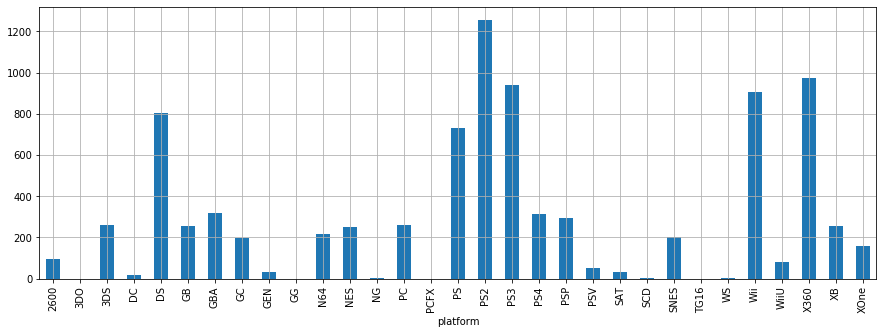

In [21]:
df.groupby(by='platform')['total_sales'].sum().plot(kind='bar', figsize=(15, 5), grid=True)

Лидеры продаж - PlayStation, PlayStation 2, PlayStation 3, Xbox 360, Wii, Nintendo DS. Консоли начиная с PS3 в этом списке выпускались в середине двухтысячных, поэтому вполе могли зацепить пик количества выпускаемых игр.

Воспользуемся библиотекой seaborn и изучим, как распределялись игры по платформам в разные года. Для корректной работы seaborn будем строить график без нулевых значений в столбце year_of_release.

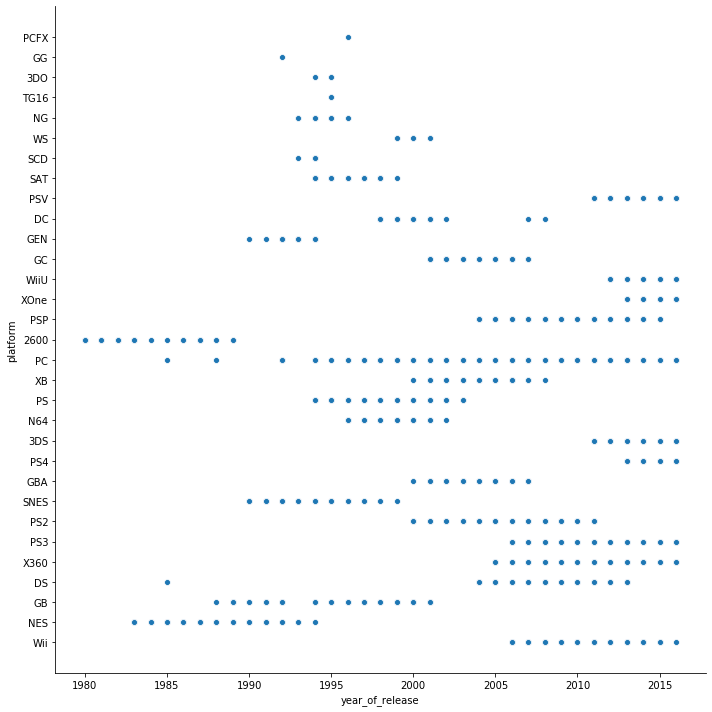

In [22]:
import seaborn as sns

sns.relplot(data = df.dropna(subset=['year_of_release']),
            y = 'platform',
            x = 'year_of_release',
            height=10)

PC - вечная платформа, и вряд ли она пропадет в ближайшие годы. Рассчитаем характерное время жизни платформы, предварительно убрав из выборки актуальные - те, на которые еще выходят игры в 2016 году.

In [23]:
#Считаем, в какие годы на платформе выходили игры. Так мы не учтем один год жизни Game Boy, но для грубой оценки пойдет.
life_years = df.groupby(by='platform')['year_of_release'].unique()

#Считаем количество лет, в которые выпускались игры на платформе. 
#Исключаем платформы, для которых игры еще выпускаются в актуальном периоде.
life_time = pd.Series({key: len(value) for key, value in life_years.items() if 2016 not in value})

#Берем медиану.
life_time.median()

8.0

Характерное время жизни платформы - 8 лет. При этом есть более и менее долгоиграющие платформы.

### Актуальный период

Отфильтруем данные, чтобы в дальнейшем анализировать показатели только за актуальный период. По объему продаж нас интересуют года с 2012 по 2016. При этом нас интересуют платформы, для которых в 2016 году выходили игры. В рамках имеющихся данных у нас есть только продажи, привязанные к году выхода игры. То есть даже если игры в определенном году не выходили под платформу, но продавались, у нас нет информации об этих продажах. Консолей, которые входят в актуальный период, но где не выпускались игры в 2016 всего две - PSP и DS.

In [24]:
df_actual = df.query('year_of_release >= 2012 and platform != "PSP" and platform != "DS"')

### Потенциально прибыльные платформы

Нас интересует, как изменяется сумма продаж по годам в зависимости от платформы.

Выберем платформы, на которых выходили игры в актуальный период, и построим для них распределение продаж по годам. Для того, чтобы было возможным сравнивать объем продаж, построим графики с одинаковым масштабом по оси y. Вычислим предельное значение для ориентира.

AxesSubplot(0.125,0.125;0.775x0.755)


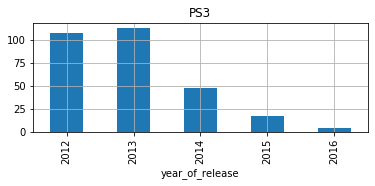

AxesSubplot(0.125,0.125;0.775x0.755)


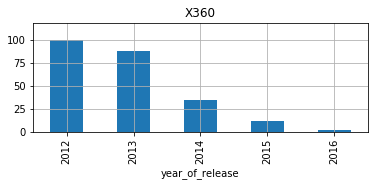

AxesSubplot(0.125,0.125;0.775x0.755)


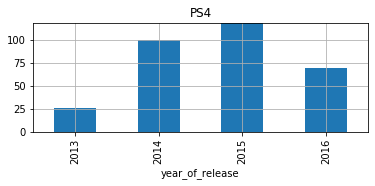

AxesSubplot(0.125,0.125;0.775x0.755)


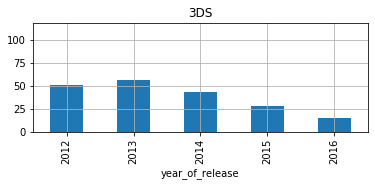

AxesSubplot(0.125,0.125;0.775x0.755)


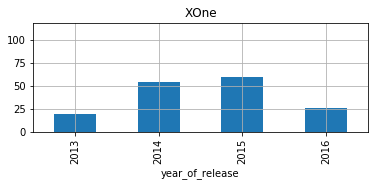

AxesSubplot(0.125,0.125;0.775x0.755)


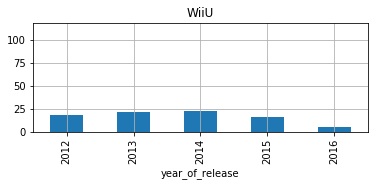

AxesSubplot(0.125,0.125;0.775x0.755)


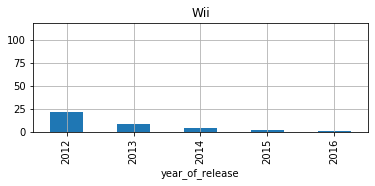

AxesSubplot(0.125,0.125;0.775x0.755)


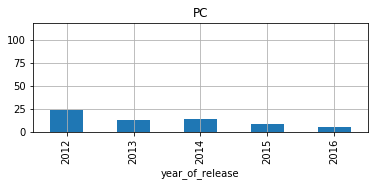

AxesSubplot(0.125,0.125;0.775x0.755)


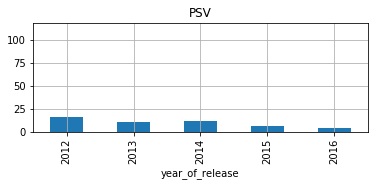

In [25]:
#Вычсиляем предел для оси y
max_sales = df_actual.groupby(by=['platform', 'year_of_release'])['total_sales'].sum().max()

#Заводим список платформ, по которым будем строить распределения
actual_platforms = df_actual['platform'].unique()

#Импортируем pyplot для удобной работы с графиками
from matplotlib import pyplot as plt

#Строим распределение продаж по годам для каждой платформы из актуального периода
for platform in actual_platforms:
    print(df_actual[df_actual['platform'] == platform].groupby(by='year_of_release')['total_sales'].sum()
          .plot(kind='bar', grid=True, title=platform, figsize=(6, 2), ylim=(0, max_sales)))
    plt.show()

В 2016 году у всех как будто бы падают продажи - это следствие того, что данные за 2016 год не полные. Не будем учитывать их для выделения потенциально прибыльных платформ.

Лидер продаж актуального периода - PlayStation 4, хотя на общем графике этого не было заметно.

Продажи явно падают у PlayStation 3, Xbox 360, зато растут у PlayStation 4 и Xbox One, которые пришли им на смену.

Продажи Wii из прошлого поколения также падают, но у Wii U перестали расти с 2015 года, в отличие от вышеупомянутых консолей Sony и Microsoft.

По другим платформам. Продажи Nintendo 3DS падают, а PlayStation Vita и ПК сложно оценить. Однако мы уже выяснили, что ПК как платформа останется актуальной надолго, а срок жизни PSV подходит к концу. 

Исходя из этого выделим список потенциально прибыльных платформ: PlayStation 4, Xbox One, ПК.

### Глобальные продажи с разбивкой по платформам

Построим диаграммы "ящик с усами" по глобальным продажам каждой игры и разбивкой по платформам. 

Оценим общую картину.

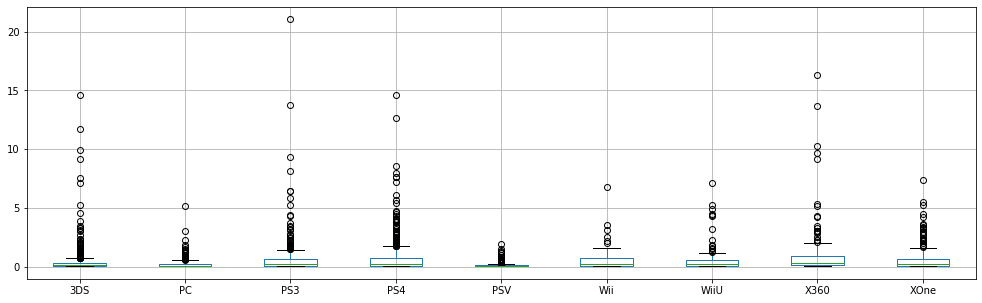

In [26]:
(df_actual.pivot_table(index='name', columns='platform', values='total_sales')
.plot.box(figsize=(17, 5), grid=True))

Разница в продажах довольно велика. Так, между продажами PS3 и PS Vita разница на порядок.

Сравним средние продажи. Ограничим график по оси y.

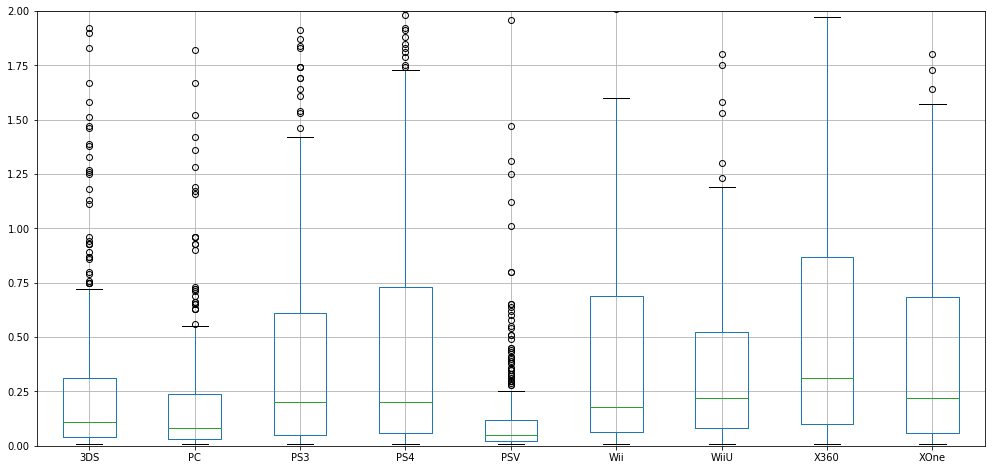

In [27]:
(df_actual.pivot_table(index='name', columns='platform', values='total_sales')
.plot.box(figsize=(17, 8), ylim=(0, 2), grid=True))

Средние продажи игр различаются не так драматично. Медианные значения лежат в пределах 0,3 млн. Средние продажи ПК, 3DS и PS Vita ниже остальных.

### Влияние отзывов на продажи

Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве примера возьмем PS4. У нее высокие продажи в целом и одни из самых высоких в среднем. Кроме того, эту платформу мы признали одной из потенциально прибыльных.

Сделаем срез по платформе.

In [28]:
df_actual_ps4 = df_actual[df_actual['platform'] == 'PS4']

Построим диаграмму рассеяния для пары отзывы пользователей - продажи.

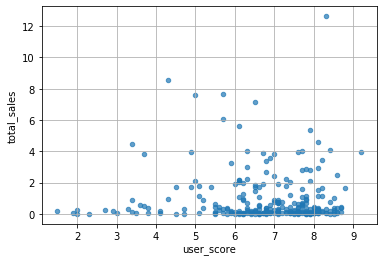

In [29]:
df_actual_ps4.plot(kind='scatter', x='user_score', y='total_sales', grid=True, alpha=0.7)

С ростом оценки пользователей появляется больший разброс в продажах, но в целом взаимосвязь не прослеживается. Посчитаем коэффициент корелляции.

In [30]:
df_actual_ps4['user_score'].corr(df_actual_ps4['total_sales'])

-0.031957110204556424

Значение коэффициента близко к нулю. Делаем вывод, что связь между оценкой пользователей и продажами не прослеживается.

Рассмотрим совместное распределение для продаж и оценок критиков.

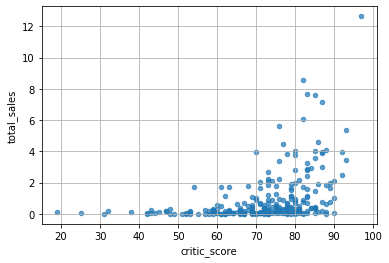

In [31]:
df_actual_ps4.plot(kind='scatter', x='critic_score', y='total_sales', grid=True, alpha=0.7)

По сравнению с предыдущим графиком здесь заметен рост продаж с ростом оценки критиков. Посчитаем коэффициент корелляции для этих величин.

In [32]:
df_actual_ps4['critic_score'].corr(df_actual_ps4['total_sales'])

0.40656790206178095

Есть слабая положительная свзяь.

#### Вывод

Оценка пользателей не влияет на продажи, тогда как оценка критиков оказывает некоторе влияние: игры с более высокой оценкой имеют более высокие продажи.

### Сравнение с продажами на других платформах

Сравним результат с влиянием оценки на продажи в целом.

In [33]:
df_actual['user_score'].corr(df_actual['total_sales'])

0.0039410548220292305

In [34]:
df_actual['critic_score'].corr(df_actual['total_sales'])

0.3082312491377457

Для PlayStation 4 связь была более выраженной, но в целом результаты похожи. Оценка пользователей не влияет на продажи игр за актуальный период, а с повышением оценки критиков продажи также могут расти.

### Распределение по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

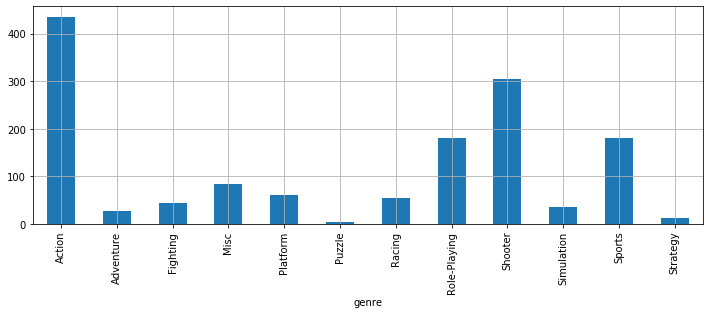

In [35]:
df_actual.groupby('genre')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12, 4))

Можно выделить жанры с высокими продажами: Action, Role-Playing, Shooter, Sports. Жанры с низкими продажами: Puzzle, Strategy, Adventure. 

### Вывод

Было исследовано, как различные факторы влияют на продажи игр.

В 2000-х выпускалось больше игр в год, чем в 2010-х. Для прогноза важнее всего данные за период 2012-2016.

Лидеры по продажам среди платформ - PlayStation, PlayStation 2, PlayStation 3, Xbox 360, Wii, Nintendo DS. Консоли начиная с PS3 в этом списке выпускались в середине двухтысячных, поэтому вполе могли зацепить пик количества выпускаемых игр. Характерный срок, за который появлявляются и исчезают платформы - 8 лет.

Исходя из динамики продаж был определен список потенциально прибыльных платформ: PlayStation 4, Xbox One, ПК.

Разница в продажах игр по платформам может быть значительна. Так, для PS3 есть игры с продажами на порядок выше, чем у игр для PS Vita. Однако средняя игра имеет сопоставимые продажи на разных платформах. 

Оценка пользателей не влияет на продажи, тогда как оценка критиков оказывает некоторе влияние: игры с более высокой оценкой имеют более высокие продажи.

Можно выделить жанры с высокими продажами: Action, Role-Playing, Shooter, Sports. Жанры с низкими продажами: Puzzle, Strategy, Adventure.

## Шаг 4. Портрет пользователя

Определим для пользователя каждого региона (NA, EU, JP):
* самые популярные платформы;
* самые популярные жанры;
* влияние рейтинга ESRB на продажи.

Будем считать, что игра выходила в регионе, если в нем ненулевые продажи.

### Платформы

Выделим топ-5 самых популярных платформ для каждого региона.

Зададим список регионов, чтобы автоматизировать процесс вычисления.

In [36]:
regions=['na_sales', 'eu_sales', 'jp_sales']

Сравним доли, которые занимают самые популярные платформы в каждом регионе.

AxesSubplot(0.260833,0.125;0.503333x0.755)


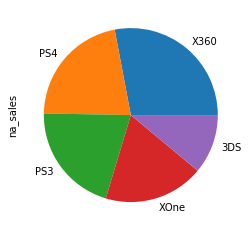

AxesSubplot(0.260833,0.125;0.503333x0.755)


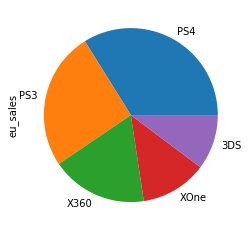

AxesSubplot(0.260833,0.125;0.503333x0.755)


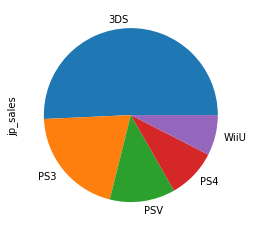

In [37]:
for region in regions:
    print(df_actual[df_actual[region] > 0].groupby('platform')[region].sum().sort_values(ascending=False).head(5)
          .plot(kind='pie'))
    plt.show()

В Северной Америке предпочитают Xbox360, в Европе - более новую PlayStation 4. Список топ-5 платформ в этих регионах составляют одни и те же консоли.

В Японии предпочитают портативные консоли - 3DS и PS Vita. Также видим, что топ здесь составлен исключительно японскими производителями - Nintendo и Sony.

### Жанры

Выделим топ-5 самых популярных жанров в каждом регионе.

AxesSubplot(0.260833,0.125;0.503333x0.755)


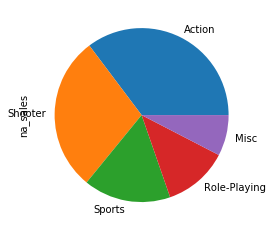

AxesSubplot(0.260833,0.125;0.503333x0.755)


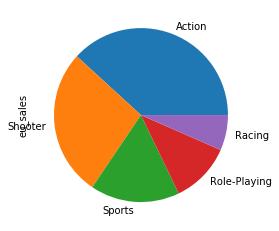

AxesSubplot(0.260833,0.125;0.503333x0.755)


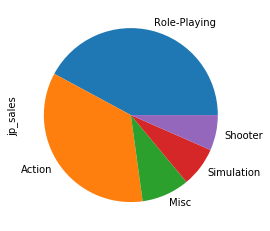

In [38]:
for region in regions:
    print(df_actual[df_actual[region] > 0].groupby('genre')[region].sum().sort_values(ascending=False).head(5)
          .plot(kind='pie'))
    plt.show()

В распределении по жанрам Северная Америка и Европа тоже похожи. Различия - доля шутеров выше в Северной Америке; в Европе предпочитают гонки, тогда как в Северной Америке - игры, собранные под жанром miscellaneous.

Рынок Японии отличается и в предпочтениях по жанрам. Здесь также любят экшн, но большую долю занимают ролевые игры. В топе есть уникальный для региона жанр симуляторов.

### Рейтинг ESRB

Изучим, как влияет рейтинг ESRB на продажи по регионам.

Расшифровка оценок:
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»

Построим графики объема продаж для игр каждого рейтинга с разбивкой по регионам. Не станем выравнивать графики по оси y, так как нас интересует распределение по рейтингу внутри региона, а не сравнение объема продаж между регионами.

AxesSubplot(0.125,0.125;0.775x0.755)


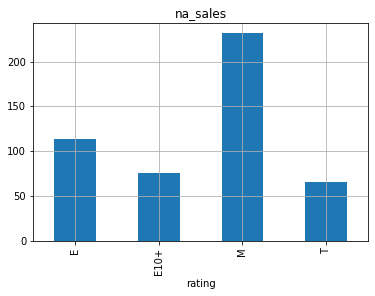

AxesSubplot(0.125,0.125;0.775x0.755)


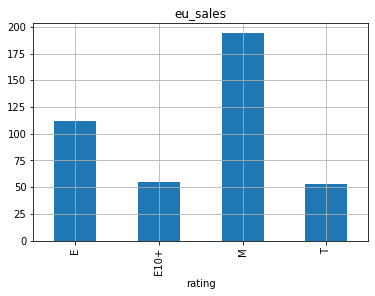

AxesSubplot(0.125,0.125;0.775x0.755)


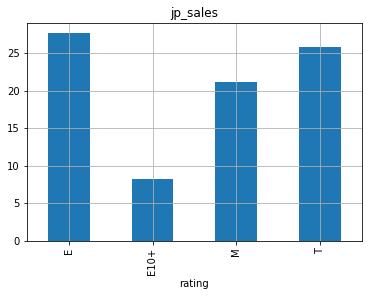

In [39]:
for region in regions:
    print(df_actual[df_actual[region] > 0].groupby('rating')[region].sum()
     .plot(kind='bar', grid=True, title=region))
    plt.show()

Соотношение в Европе и Северной Америке приблизительно похоже. Различие в том, что в Европе игры для всех пользуются большей популярностью, чем игры 10+ и для подростков.

В Японии, напротив, самые большие продажи у игр для подростков и игр для всех возрастов.

### Вывод

Пользователи в Европе и Северной Америке похожи между собой по предпочтениям в жанрах, платформах и категориях игр по возрастному ограничению. Они предпочитают домашние консоли Sony и Microsoft; игры в жанрах экшн, шутер и спорт; игры для всех возрастов и для взрослой аудитории.

Пользователи в Японии предпочитают консоли, произведенные в Японии, в частности портативные версии. Жанры, которые особенно популярны только в Японии - ролевые игры и симуляторы. Особенность возрастной аудитории - большая доля игр для подростков и для всех возрастов. Однако экшн и игры категории для взрослых здесь любят как и везде.

## Шаг 5. Проверяем гипотезы

Необходимо проверить следующие утверждения:
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

В обоих случаях нам подойдет t-тест для проверки гипотезы о равенстве средних двух генеральных совокупностей. Нулевую гипотезу для такой проверки будем формулировать так, чтобы проверять именно равенство. 

Воспользуемся методом ttest_ind библиотеки scipy. Пороговое значение alpha зададим в 5%.

### Пользовательские рейтинги платформ Xbox One и PC

Сформулируем нулевую гипотезу H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Тогда альтернативная гипотеза H1: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Зададим пороговое значение и импортируем нужную нам часть библиотеки scipy.

In [40]:
alpha = 0.05

In [41]:
from scipy import stats as st

Для корректной работы t-теста уберем пропущенные пользовательские оценки.

In [42]:
df_actual_good = df_actual.dropna(subset=['user_score'])

Проведем статистический тест.

In [43]:
xbox_one = df_actual_good[df_actual_good['platform'] == 'XOne']['user_score']
pc = df_actual_good[df_actual_good['platform'] == 'PC']['user_score']

results = st.ttest_ind(xbox_one, pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Сравним непосредственно средние значения выборок.

In [44]:
df_actual_good[df_actual_good['platform'] == 'XOne']['user_score'].mean()

6.521428571428572

In [45]:
df_actual_good[df_actual_good['platform'] == 'PC']['user_score'].mean()

6.4286407766990274

Средние значения пользовательских рейтингов для Xbox One и ПК достаточно близки, чтобы мы могли считать их одинаковыми.

### Пользовательские рейтинги жанров Action и Sports

Сформулируем нулевую гипотезу H0: средние пользовательские рейтинги жанров Action и Sports одинаковые. Тогда альтернативная гипотеза H1: средние пользовательские рейтинги жанров Action и Sports различаются.

Проведем аналогичный предыдущему статистический тест.

In [46]:
action = df_actual_good[df_actual_good['genre'] == 'Action']['user_score']
sports = df_actual_good[df_actual_good['genre'] == 'Sports']['user_score']

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.639495732612309e-26
Отвергаем нулевую гипотезу


Сравним непосредственно средние значения выборок.

In [47]:
df_actual_good[df_actual_good['genre'] == 'Action']['user_score'].mean()

6.8336538461538465

In [48]:
df_actual_good[df_actual_good['genre'] == 'Sports']['user_score'].mean()

5.466494845360825

В среднем игры жанра экшн получают более высокий пользовательский рейтинг.

### Вывод

Были проведены статистические тесты для проверки гипотезы о равенстве средних для двух генеральных совокупностей. Пороговое значение alpha было выбрано в 5%. Для уточнения результатов теста было использовано сравнение средних величин в рассматриваемых выборках.

Сравнение оценок пользователей для платформ  Xbox One и ПК показало, что средняя оценка не различается.

Сравнение оценок пользователей для жанров Action и Sports показало, что средняя оценка жанра Action выше.

## Шаг 6. Подводим итоги

Были изучены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, доступные из открытых источников до 2016 года. Были выявлены определяющие успешность игры закономерности.

Имеющиеся данные были подготовлены к дальнейшему анализу: скорректированы названия столбцов и формат данных, оценены пропуски (не подлежат заполнению), посчитаны суммарные продажи по всем регионам.

Были исследованы выпуск и продажа игр: в разрезе по годам мы выявили актуальный для анализа период 2012-2016 гг. Было выявлено характерное время жизни игровой платформы - 8 лет. Были выявлены наиболее прибыльные платформы: Xbox One, PlayStation 4, PC. Было установлено, что пользовательская оценка не влияет на объем продаж, а оценка критиков кореллирует с продажами. Были выявлены самые прибыльные жанры: Action, Role-Playing, Shooter, Sports.

Был составлен портрет пользователя каждого региона. Пользователи в Европе и Северной Америке предпочитают домашние консоли Sony и Microsoft; игры в жанрах экшн, шутер и спорт; игры для всех возрастов и для взрослой аудитории. Пользователи в Японии предпочитают консоли Sony и Nintendo, в частности портативные версии. Жанры - экшн, ролевые игры и симуляторы. Возрастные категории - игры для подростков, для всех возрастов, для взрослых.

Были проверены гипотезы о совпадении пользовательского рейтинга для платформ Xbox One и ПК, а также о различии этого рейтинга для жанров Action и Sports. Средние оценки платформ Xbox One и ПК совпадают; средние оценки жанра Action выше.

Таким образом в планировании рекламной кампании следует обратить внимание на игры, выходящие под Xbox One, PlayStation 4, PC; особенно обратить внимание на игры жанра Action; также на игры жанров Role-Playing, Shooter, Sports.